In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Importing the required librairies 
#data analysis and wrangling 
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt, seaborn as sns 
import random as rnd 
%matplotlib inline 

#machine learning 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron 
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier 
import warnings 
warnings.filterwarnings('ignore')


In [3]:
#loading the data sets 
train_df = pd.read_csv("/kaggle/input/titanic/train.csv") 
test_df = pd.read_csv("/kaggle/input/titanic/test.csv") 
combined_df = [train_df, test_df] 


In [4]:
#Aanalyze by describing the data 
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#preview the data 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#checking the data info 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#checking the null values in data 
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
#checking the summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index= False).mean().sort_values(by= 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index = False).mean().sort_values(by='Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
### Analyse the data by visualizing data 


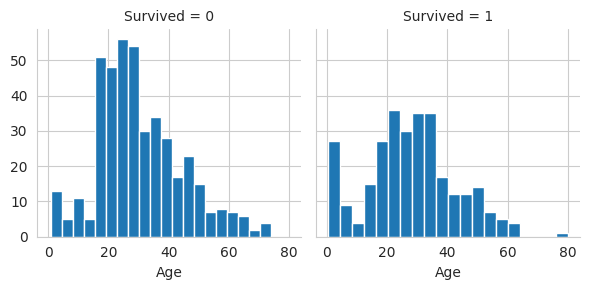

In [17]:
sns.set_style('whitegrid')
g = sns.FacetGrid(train_df,  col= 'Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

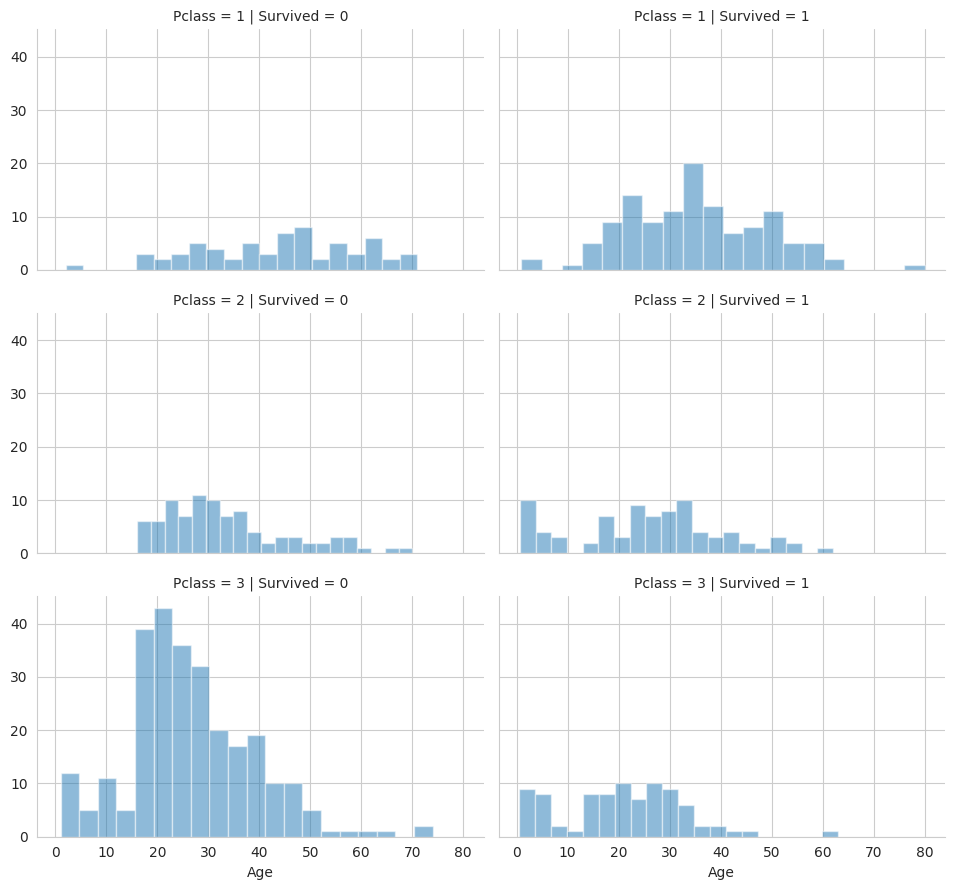

In [18]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins= 20) 
grid.add_legend();

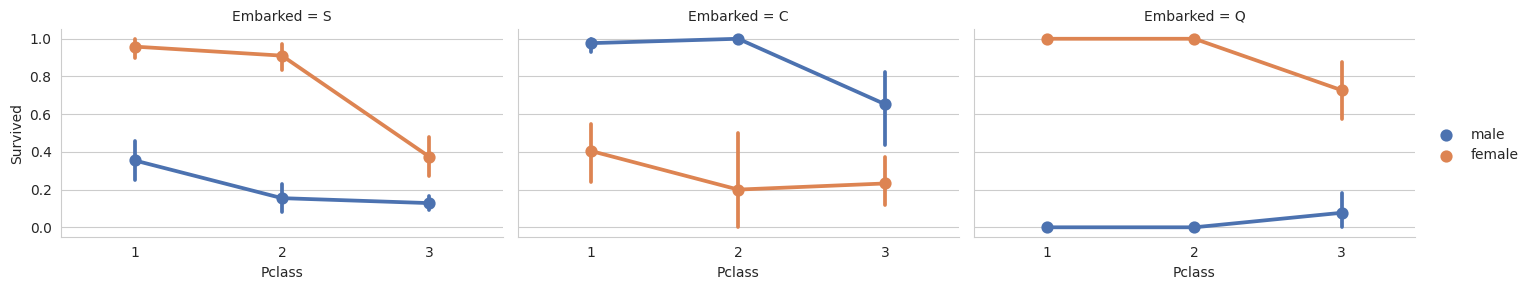

In [19]:
grid = sns.FacetGrid(train_df, col='Embarked', aspect= 1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex',palette='deep')
grid.add_legend()
plt.show()

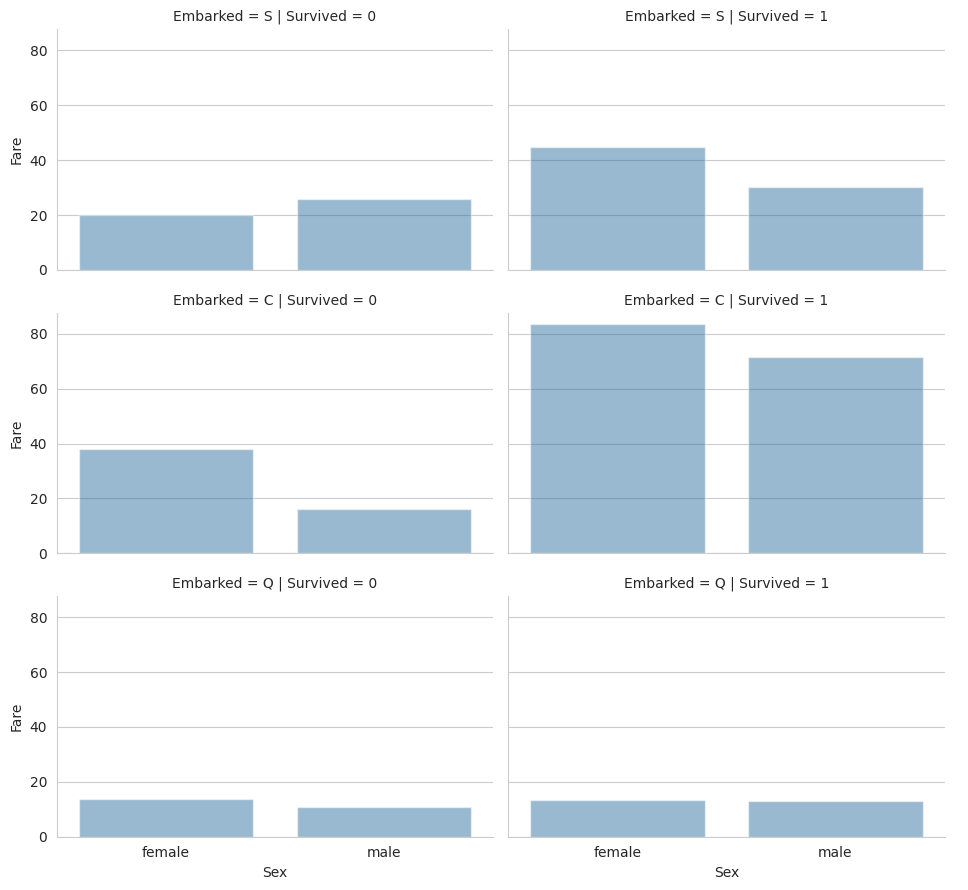

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived',aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()

### Wrangle data 
### Correcting by droping the features


In [21]:
print("Before",test_df.shape, combined_df[0].shape, combined_df[1].shape)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)
"After", train_df.shape, test_df.shape, combined_df[0].shape, combined_df[1].shape



Before (418, 11) (891, 12) (418, 11)


('After', (891, 12), (418, 9), (891, 12), (418, 11))

In [22]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [23]:
### Creating new feartures extracting from existing 
for dataset in combined_df: 
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False) 
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
# we can replace many titles with a more common name or classify them as Rare
for dataset in combined_df: 
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.793651
4,Ms,1.000000
5,Rare,0.347826


In [25]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master":4,"Rare": 5}
for dataset in combined_df: 
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [26]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1) 
combined_df = [train_df, test_df]
train_df.shape, test_df.shape

((891, 11), (418, 8))

In [27]:
#converting a categorical feature
for dataset in combined_df: 
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3.0
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1.0


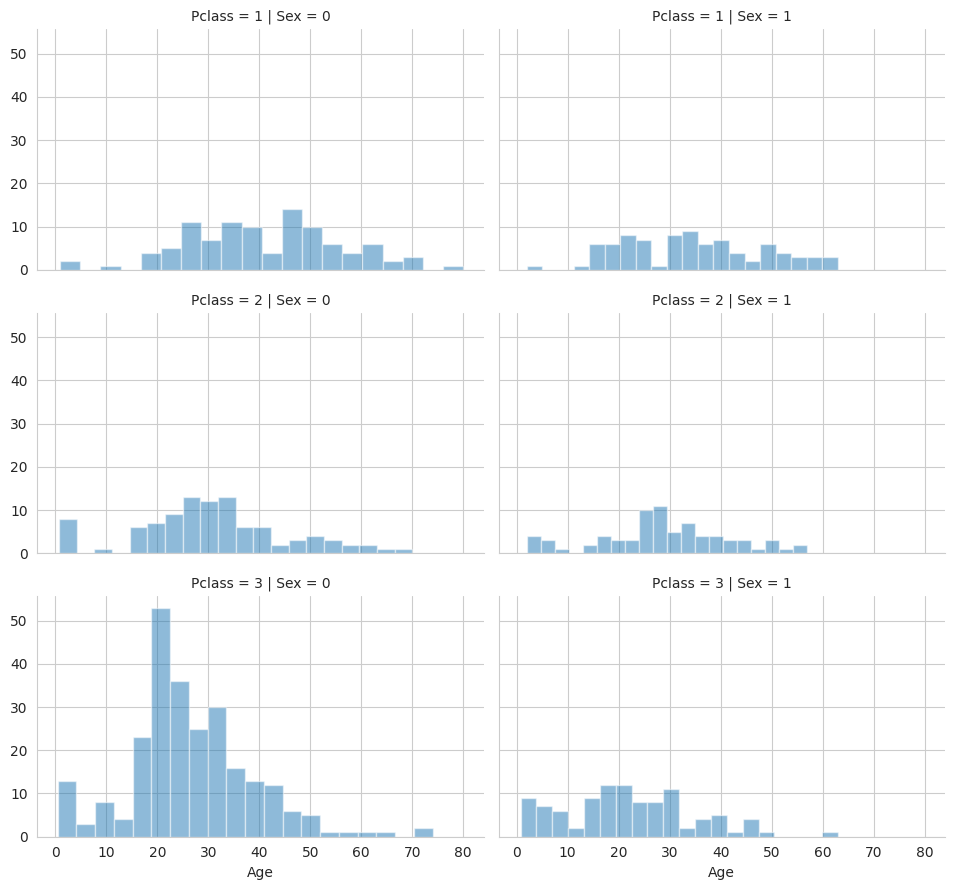

In [28]:
#completing a numerical continues feature 
#grid = sns.FacetGrid(train_df, row= 'Pclass', col='Sex',aspect=1.6)
grid = sns.FacetGrid(train_df, row='Pclass', col = 'Sex', aspect = 1.6) 
grid.map(plt.hist, 'Age', alpha = .5, bins =20)
grid.add_legend()
plt.show()

In [29]:
for dataset in combined_df:
    guess_ages = dataset.groupby(['Sex', 'Pclass'])['Age'].median().values.reshape(2, 3)
    dataset['Age'] = dataset.apply(lambda x: guess_ages[x['Sex'], x['Pclass'] - 1] if pd.isnull(x['Age']) else x['Age'], axis=1)
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,1.0
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,3.0
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,1,1,1,35,1,0,113803,53.1000,C123,S,3.0
4,0,3,0,35,0,0,373450,8.0500,NaN,S,1.0


In [30]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by='AgeBand', ascending = True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [31]:
#let us replace the age with ordinals based on these bands.
for dataset in combined_df:
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 16, 32, 48, 64, np.inf], labels=False, right=False)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,AgeGroup
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,1.0,"(16.0, 32.0]",1
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,3.0,"(32.0, 48.0]",2
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,"(16.0, 32.0]",1
3,1,1,1,35,1,0,113803,53.1000,C123,S,3.0,"(32.0, 48.0]",2
4,0,3,0,35,0,0,373450,8.0500,NaN,S,1.0,"(32.0, 48.0]",2


In [32]:
# we can not remove the ageband feature
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,AgeGroup
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,1.0,"(16.0, 32.0]",1
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,3.0,"(32.0, 48.0]",2
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,"(16.0, 32.0]",1
3,1,1,1,35,1,0,113803,53.1000,C123,S,3.0,"(32.0, 48.0]",2
4,0,3,0,35,0,0,373450,8.0500,NaN,S,1.0,"(32.0, 48.0]",2


In [33]:
train_df.drop(['Ticket', 'Cabin', 'AgeBand'], axis=1, inplace=True)
combined_df = [train_df,test_df]
train_df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22,1,0,7.2500,S,1.0,1
1,1,1,1,38,1,0,71.2833,C,3.0,2
2,1,3,1,26,0,0,7.9250,S,2.0,1
3,1,1,1,35,1,0,53.1000,S,3.0,2
4,0,3,0,35,0,0,8.0500,S,1.0,2


In [34]:
for dataset in combined_df: 
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [35]:
for dataset in combined_df: 
    dataset['IsAlone'] = 0 
    dataset.loc[dataset['FamilySize'] ==1 , 'IsAlone'] =1 
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [36]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'], axis=1) 
trest_df = test_df.drop(['Parch','SibSp','FamilySize'], axis=1) 
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeGroup,IsAlone
0,0,3,0,22,7.2500,S,1.0,1,0
1,1,1,1,38,71.2833,C,3.0,2,0
2,1,3,1,26,7.9250,S,2.0,1,1
3,1,1,1,35,53.1000,S,3.0,2,0
4,0,3,0,35,8.0500,S,1.0,2,1


In [37]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [38]:
for dataset in combined_df: 
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending = False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [39]:
#converting categorical features to numeric 
# we can now convert the EmbarkedFill Features by creating a new numeric port features 
for dataset in combined_df:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_df = combined_df[0]
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize,IsAlone
0,0,3,0,22,1,0,7.2500,0,1.0,1,2,0
1,1,1,1,38,1,0,71.2833,1,3.0,2,2,0
2,1,3,1,26,0,0,7.9250,0,2.0,1,1,1
3,1,1,1,35,1,0,53.1000,0,3.0,2,2,0
4,0,3,0,35,0,0,8.0500,0,1.0,2,1,1


In [40]:
combined_df

[     Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Title  \
 0           0       3    0   22      1      0   7.2500         0    1.0   
 1           1       1    1   38      1      0  71.2833         1    3.0   
 2           1       3    1   26      0      0   7.9250         0    2.0   
 3           1       1    1   35      1      0  53.1000         0    3.0   
 4           0       3    0   35      0      0   8.0500         0    1.0   
 ..        ...     ...  ...  ...    ...    ...      ...       ...    ...   
 886         0       2    0   27      0      0  13.0000         0    5.0   
 887         1       1    1   19      0      0  30.0000         0    2.0   
 888         0       3    1   21      1      2  23.4500         0    2.0   
 889         1       1    0   26      0      0  30.0000         1    1.0   
 890         0       3    0   32      0      0   7.7500         2    1.0   
 
      AgeGroup  FamilySize  IsAlone  
 0           1           2        0  
 1        

In [41]:
#we may also want to roudn off the fare to two decimals as it represents currency
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FamilySize,IsAlone
0,892,3,0,34,0,0,7.8292,2,2,1,1
1,893,3,1,47,1,0,7.0000,0,2,2,0
2,894,2,0,62,0,0,9.6875,2,3,1,1
3,895,3,0,27,0,0,8.6625,0,1,1,1
4,896,3,1,22,1,1,12.2875,0,1,3,0


In [42]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [43]:
for dataset in combined_df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)


train_df = train_df.drop(['FareBand'], axis=1)
combined_df = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize,IsAlone
0,0,3,0,22,1,0,0,0,1.0,1,2,0
1,1,1,1,38,1,0,3,1,3.0,2,2,0
2,1,3,1,26,0,0,1,0,2.0,1,1,1
3,1,1,1,35,1,0,3,0,3.0,2,2,0
4,0,3,0,35,0,0,1,0,1.0,2,1,1
5,0,3,0,25,0,0,1,2,1.0,1,1,1
6,0,1,0,54,0,0,3,0,1.0,3,1,1
7,0,3,0,2,3,1,2,0,4.0,0,5,0
8,1,3,1,27,0,2,1,0,3.0,1,3,0
9,1,2,1,14,1,0,2,1,3.0,0,2,0


In [44]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FamilySize,IsAlone
0,892,3,0,34,0,0,0,2,2,1,1
1,893,3,1,47,1,0,0,0,2,2,0
2,894,2,0,62,0,0,1,2,3,1,1
3,895,3,0,27,0,0,1,0,1,1,1
4,896,3,1,22,1,1,1,0,1,3,0


In [45]:
train_df.drop('Title', axis = 1, inplace = True)

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FamilySize,IsAlone
0,0,3,0,22,1,0,0,0,1,2,0
1,1,1,1,38,1,0,3,1,2,2,0
2,1,3,1,26,0,0,1,0,1,1,1
3,1,1,1,35,1,0,3,0,2,2,0
4,0,3,0,35,0,0,1,0,2,1,1


### Spliting the Data in train and test sets

In [47]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

### Model, predict and solve
#### Now we are ready to train a model and predict the required solution.


#### These include:

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

In [48]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.59

In [49]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.508505
7,AgeGroup,0.546374
5,Fare,0.276137
8,FamilySize,0.218353
6,Embarked,0.208781
2,Age,-0.073274
4,Parch,-0.473411
9,IsAlone,-0.548289
3,SibSp,-0.824032
0,Pclass,-0.936600


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
Inversely as Pclass increases, probability of Survived=1 decreases the most.
This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
So is Title as second highest positive correlation.

In [50]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.69

In [51]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

88.44

In [52]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


77.22

In [53]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

54.32

In [54]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc


68.13

In [55]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.58

In [56]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

94.84

In [57]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

94.73

In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,94.84
3,Random Forest,94.73
1,KNN,88.44
2,Logistic Regression,81.59
6,Stochastic Gradient Decent,80.58
4,Naive Bayes,77.22
0,Support Vector Machines,68.69
7,Linear SVC,68.13
5,Perceptron,54.32


In [59]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })



In [60]:
submission


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
#import os
#os.makedirs('../output', exist_ok=True)


In [62]:
submission.to_csv('submission.csv', index=None)
